# Event-data Representation and Visualization

The **goals** of this exercise are:
- to familiarize yourself with the data produced by an event-based camera
- to practice converting the event data into image-like (also called "grid-based" or "array-based") representations, which is a common practice of many algorithms (without judging whether it is "optimal" or not).
- to produce "pretty plots" (never underestimate the value of good figures on reports and papers).

For this exercise let us use data from the `slider_depth` sequence in the [Event Camera Dataset and Simulator (IJRR'17)](http://rpg.ifi.uzh.ch/davis_data.html). A small portion of this data is provided in the folder `/slider_depth`". The reasons to use this file are that it is available in simple txt format and that it is small (i.e., manageable). 

The sequences in the above-mentioned dataset were recorded with a DAVIS240C camera (from iniVation) and they also contain grayscale frames, recorded at about 25 Hz (frames per second). The frames can be helpful to get a better idea of the scene. Once you are comfortable with the exercise, feel free to use other sequences or data from other publicly available [datasets](https://github.com/uzh-rpg/event-based_vision_resources/blob/master/README.md#datasets-sorted-by-topic).

This exercise is not as guided as the first one. Instead of filling in the blanks, here we show the plots and you are asked to write code to produce such plots (approximately). You may use tools such as numpy and matplotlib. If possible, try also to write it nicely, using resuable functions.

# Data format

Events in the txt files of the IJRR'17 dataset are given one per line. For example, the first ten lines of the slider_depth txt file are:

    0.003811000 96 133 0
    0.003820001 127 171 0
    0.003836000 4 160 0
    0.003837000 149 122 0
    0.003848001 63 121 1
    0.003849001 17 144 1
    0.003852000 92 119 0
    0.003866001 16 137 1
    0.003875000 156 71 0
    0.003879000 26 149 0

That is, data is given in the form:

    t, x, y, p

timestamp $t$ (in seconds), $x$ pixel coordinate (horizontal or column index), $y$ pixel coordinate (vertical coordinate or row index) and polarity $p$ (1 bit of information with the sign of the brightness change: 1 if positive, 0 if negative). Since the DAVIS240C has a spatial resolution of 240 x 180 pixels, $x$ and $y$ adopt values in $\{0,\ldots,239\}$ and $\{0,\ldots,179\}$, respectively.

You first task is to read the data from file (loading it into temporal variables).

In [4]:
import os
import numpy as np
from matplotlib import pyplot as plt

Here is some code to read the data in a txt file with the format shown above

In [20]:
# Simple codre. There may be more efficient ways.
def extract_data(filename):
    # Open the file for reading
    infile = open(filename, 'r')

    # Initialize lists to store the data we read
    timestamp = []
    x = []
    y = []
    pol = []

    # Read each line in the file
    for line in infile:
        # Split the line into a list of strings
        words = line.split()
        timestamp.append(float(words[0]))
        x.append(int(words[1]))
        y.append(int(words[2]))
        pol.append(int(words[3]))
    infile.close()

    return timestamp,x,y,pol

In [21]:
filename_sub = 'slider_depth/events_chunk.txt'
# Call the function to read data    
timestamp, x, y, pol = extract_data(filename_sub)

For this exercise, let us provide the sensor size (height, width)

In [11]:
img_size = (180,240)

# Space-time plot

The following figure shows a visualization of (the first 2000) events in space-time (image plane of the camera amd time).

![Events, space-time and polarity](images/space_time_pol.png)

Let us first try to plot something simpler (with fewer dimensions).
The following plots were generated with events between $N_e=5000$ and $N_e = 50000$.


# Image-like (2D grid) representation

## Histograms of events (Event count)
You are asked to write Python code to create the following image. It has been generated by accumulating the event polarities pixel-wise from the first $N_e=5000$ in the file.

![balance_polarities_gray](images/balance_polarities_gray.png)

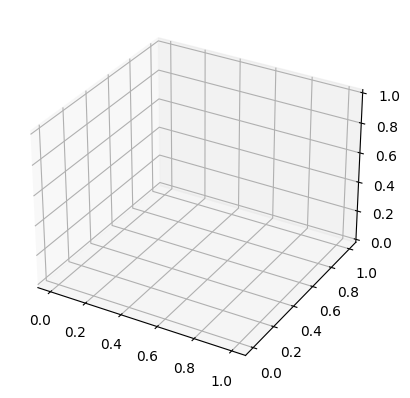

In [8]:
# Write code...
ax = plt.axes(projection='3d')
colors = np.array(['r', 'b'])[pol]
ax.scatter3D(x, y, timestamp, c=colors, s=1);

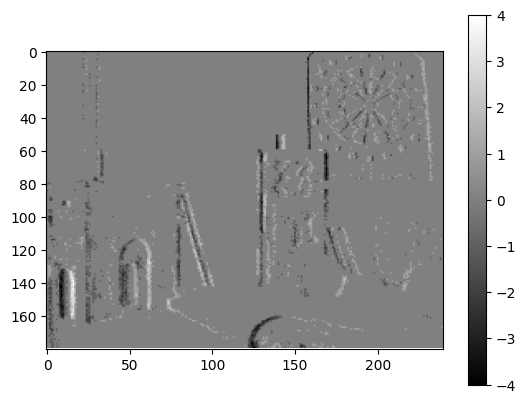

In [24]:
#plot image
img = np.zeros(img_size, dtype=np.int8)
for i in range(5000):
    img[y[i],x[i]] += (2*pol[i]-1)#convert to -1,1
    
    # img[y[i],x[i]] += (pol[i])

maxabsval = np.amax(np.abs(img))
fig = plt.figure()
plt.imshow(img, cmap='gray',clim=(-maxabsval,maxabsval))
plt.colorbar()
plt.show()

- What do the "three colors" in the image represent?
- What is the maximum number of positive events at any pixel?
- and the maximum number of negative events at any pixel?
- What could such an image be used for?

In [ ]:
# Write your answers...

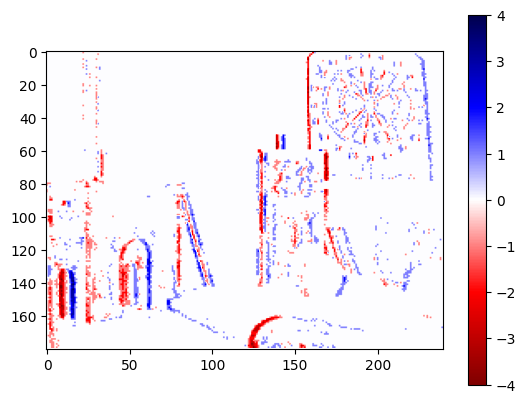

In [25]:
plt.imshow(img, cmap='seismic_r',clim=(-maxabsval,maxabsval))
plt.colorbar()
plt.show()

Next, consider using [pseudocolor](https://en.wikipedia.org/wiki/False_color) to display the events. Write code to generate the following image.

![balance_polarities_red_blue](images/balance_polarities_red_blue.png)

- What do the white, red and blue colored pixels represent?
- Why is blue color used instead of green color?

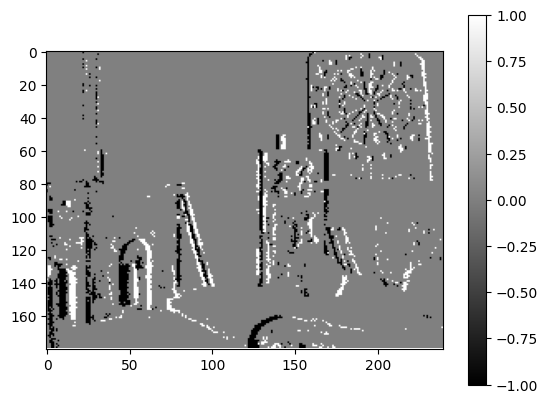

In [26]:
img = np.zeros(img_size, dtype=np.int8)
for i in range(5000):
    img[y[i],x[i]] = (2*pol[i]-1)#convert to -1,1   #by only adding the last event, without accumulating
    # img[y[i],x[i]] += (pol[i])

maxabsval = np.amax(np.abs(img))
fig = plt.figure()
plt.imshow(img, cmap='gray',clim=(-maxabsval,maxabsval))
plt.colorbar()
plt.show()

Please write code to plot an image where every pixel may have only three possible values (ternary image): -1, 0, 1. You may set every pixel using, for example, the last event polarity at that pixel.

![ternary_gray](images/ternary_gray.png)

- What could this type of representation be good for compared to the histogram one (above)?

Next, you are asked to split by polarity, that is, to compute and plot one histogram of events for each event polarity. One for positive events and one for negative events, as shown next.

![](images/hist2d_pos_veridi.png)
![](images/hist2d_neg_veridi.png)

- Can you clearly identify both polarities in the moving edges?

## Images of timestamps

Other useful representations are those that, instead of counting events at every pixel, just show a timestamp per pixel. It could be the last timestamp, an average timestamp or a timestamp composed with an exponential decay.
They are also called "time surfaces", "time maps" or "surface of active events".

### Time maps with exponential decay

Next, write code to replicate the type of time-images of the [2015 PAMI paper HOTS, Fig. 2](https://www.neuromorphic-vision.com/public/publications/1/publication.pdf).
Use 50000 events to better see the traces of the edges as they trigger events when they move through the image plane.

$ image(x,y; t) = exp(-|t-T(x,y)| / \tau) $

This is equation (3) in the above paper. The paper uses $\tau = 50$ ms (see the bottom of page 8). For the plots below, a value $\tau = 30$ ms is used. $\tau$ is a tunable parameter that depends on the motion in the scene.
Note that the paper uses a neighborhood ("context") of size $(2R+1)\times (2R+1)$ centered at the last event. Instead, you are aked to visualize the time surface using all image pixels (not a subset of them).

Also note that the paper uses the polarity $p$ as an argument of the time map $T$, while here it is not explicitly written. The following figure shows both polarities on the same time map, which is not easy to write with such a notation.

![](images/ts_exp_pol.png)

Next, you are asked to split by polarity, creating one plot for each event polarity:

![](images/ts_exp_pos.png)
![](images/ts_exp_neg.png)

- Describe what you see in this representation and whether it is better or not to split by polarity. In what situations?
- Is there the same amount of noise on both type of events (positive, negative)?

<!-- ![](images/ts_exp_pol_red_blue.png) 
![](images/ts_exp_balance_pol_red_blue.png) -->

### Average timestamp images.
In this type of representation, each pixel contains the average timestamp of the events that happened in it in the last few milliseconds. (There is no exponential decay, just an average).

![](images/t_ave_both_pols.png)

Next, split by polarity:

![](images/t_ave_pos.png)
![](images/t_ave_neg.png)

- Describe what you oberve compared to previous representations.

# Space-time plots

Next, we take a look at different ways to visualize events in space-time. Such a space-time is obtained by considering a temporal window of the signal that is output by the camera as a response of the light arriving at the image plane (i.e., the "retina").

## Point set

Write Python code to plot the first $N_e = 2000$ events in space-time, like a point set or point "cloud":

![Events, space-time and polarity](images/space_time_pol.png)

You may find the [3D scatterplot example](https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html) useful.

Try experimenting by moving around the viewpoint (clicking on the figure generated by Python's matplotlib).

- For us, humans, is the information more intelligible from any specific viewpoint?
- What information do you gain by looking at this point cloud from directions parallel to each of the coordinate axes?

Then, write a function to generate a short **[movie](movie.mp4)** that smoothly shows the intermediate viewpoints between two specified ones (the start and end viewpoints). See the following VLC player screenshot.
Suggestion: use the matplotlib command `ax.view_init(azim=XXX,elev=ZZZ)`. Write images to disk and create a movie from them using ffmpeg. There is no need to install ffmpeg; you may use the [static build](https://johnvansickle.com/ffmpeg/). Video [coding options](https://trac.ffmpeg.org/wiki/Encode/H.264), such as lossless.

![movie snapthot on VLC](images/movie_vlc_pointset.png)

## Voxel grid representation

Next, you are asked to write code to convert the event data into a 3D histogram. To this end, events shall be collected into bins: 1 bin per pixel in space and say 5 bins in time. Feel free to write your own function to compute the 3D histogram or to use numpy's [histogramdd](https://numpy.org/doc/stable/reference/generated/numpy.histogramdd.html?highlight=histogramdd#numpy.histogramdd) function. Actually it is good to compute the histogram using both methods and making sure that both agree.

### Regular histogram
Write python code to compute the 3D histogram and display it as a voxel grid. 
Every voxel counts the number of events falling (i.e., binned) within it, regardless of polarity.
Suggestion: [this sample code](https://matplotlib.org/3.1.1/gallery/mplot3d/voxels_rgb.html#sphx-glr-gallery-mplot3d-voxels-rgb-py)

![voxel histogram](images/voxel_nn.png)

- What are the minimum and maximum number of events at any voxel?
- How many voxels are there? How many are "occupied" (i.e., have a non-zero value)? (voxel grids are also known as "occupancy maps" in Robotics). What is the ratio between these numbers? (How sparse is the data?)

### Interpolated histogram
(Smooth histogram that also includes polarity information).
Next, modify the code you have written to include polarity. That is, instead of counting events on every bin, "count" the polarity. Moreover, to make the histogram smoother, use a linear voting scheme by which an event splits its polarity in its two closest temporal bins. The split takes into account the distance from the event to both bins. (This idea of smoothing a histogram is similar to the idea of kernel density estimation). The following plot illustrates this idea of "smoothing" the histogram.

![histogram smoothing](images/histogram_smoothing.png)

The next figure shows the voxel grid obtained by using linear voting of polarity (per-voxel balance of linearly-interpolated polarity). Grayscale values are used: dark values represent negative events (voxels with negative balance of polarities) and bright values represent positive events (voxels with positive balance of polarities).

![voxel linear voting with polarity](images/voxel_linvote_pol.png)

- What are the minimum and maximum value of the balance of event polarities at the voxels?
- Does this way of computing the histogram, including polarity, affect the above "sparsity ratio"?
- How does this (3D) voxel grid representation compare to 2D representations? For example in terms of memory, in terms of preservation of the information contained in the event data?
- What could the voxel grid representation be good for?
- How would you interpret the above voxel grid in terms of a continuous "polarity field" $p(x,y,t)$ or the temporal derivative of the brightness signal arriving at the sensor $\frac{\partial L}{\partial t}(x,y,t)$?

## Try experimenting
Try to come up with new plots (alternative data representations) that reveal some aspect of the information contained in the event data.